## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.


In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 18.65 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
# Load the data

import pandas as pd

df = pd.read_csv('./kmc/data/airbnb_hw.csv')
print(df.columns)
df.head()

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
# Renaming variables
price = df['Price']
beds = df['Beds']
num_reviews = df['Number Of Reviews']
review_scores_rating = df['Review Scores Rating']

In [4]:
# Cleaning 'Price'
# print('Before:', '\n', price.value_counts(), price.unique(), (price.isna().sum())/len(df))

# No missing values, we just want to remove commas
price = price.str.replace(',', '')
# print('After:', '\n', price.unique())

# Convert to int
price = pd.to_numeric(price, errors="coerce")
print('After:', '\n', price.unique())

After: 
 [  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119

In [5]:
# Cleaning 'Beds'
# print(beds.value_counts(), '\n', 'Missing:', beds.isna().sum(), '\n', 'Missing %:', (beds.isna().sum())/len(df))

# missing_beds = df.loc[beds.isna(), :]
# print(missing_beds.head())

# Only 0.2% missing values in beds, so we will just drop these rows
beds = beds.dropna()
print('Missing %:', (beds.isna().sum())/len(df)) # Sanity check

Missing %: 0.0


In [6]:
# Cleaning Reviews Scores Ratings
# print(review_scores_rating.unique(), '\n', 'Missing %:', review_scores_rating.isna().sum()/len(df))
# 27% of values are missing

# Investigate missing values
print(pd.crosstab(review_scores_rating.isna(), num_reviews>0))

# There are 509 true missing values, but 7814 missing values because there are no
# reviews (num_reviews>0 is False, so will just drop na values.

review_scores_rating = review_scores_rating.dropna()
print('Missing %:', review_scores_rating.isna().sum()/len(df)) # Sanity check


Number Of Reviews     False  True 
Review Scores Rating              
False                     0  22155
True                   7814    509
Missing %: 0.0


In [7]:
# Restore original variable names

df['Beds'] = beds
df['Number Of Reviews'] = num_reviews
df['Review Scores Rating'] = review_scores_rating
df['Price'] = price

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [8]:
# Get predictor variables
X = df.loc[:, ['Beds', 'Price', 'Review Scores Rating', 'Number Of Reviews']]
X = X.dropna() # drop nan's
X.describe()

,Beds,Price,Review Scores Rating,Number Of Reviews
count,22111.000000,22111.000000,22111.000000,22111.000000
mean,1.558093,154.798697,91.991633,16.523179
std,1.044014,148.901275,8.851965,24.322185
min,0.000000,10.000000,20.000000,1.000000
25%,1.000000,85.000000,89.000000,3.000000
50%,1.000000,125.000000,94.000000,7.000000
75%,2.000000,190.000000,100.000000,20.000000
max,16.000000,10000.000000,100.000000,257.000000


In [9]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

Z = X.apply(maxmin)
Z.describe()

,Beds,Price,Review Scores Rating,Number Of Reviews
count,22111.000000,22111.000000,22111.000000,22111.000000
mean,0.097381,0.014494,0.899895,0.060637
std,0.065251,0.014905,0.110650,0.095009
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.007508,0.862500,0.007812
50%,0.062500,0.011512,0.925000,0.023438
75%,0.125000,0.018018,1.000000,0.074219
max,1.000000,1.000000,1.000000,1.000000


3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [10]:
# Drop 'Price'
Z = Z.drop('Price', axis=1)

In [11]:
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

# Create a kmc model
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)

# Fit the model
model = model.fit(Z)

# Cluster data
Z['cluster'] = model.labels_ # Assigns cluster labels to each data point based on the model, so each data point belongs to a cluster

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

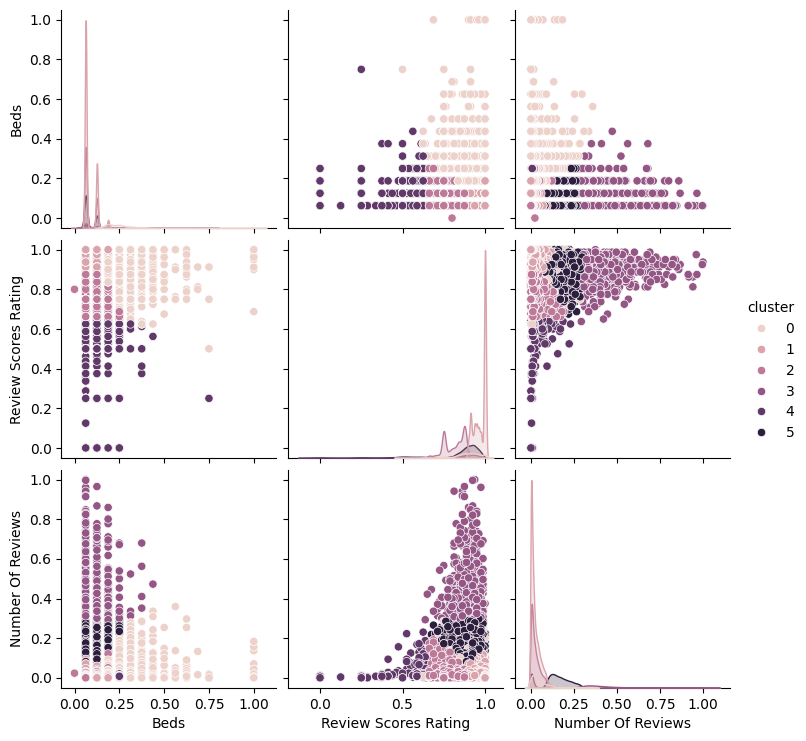

In [12]:
import seaborn as sns

sns.pairplot(data=Z, hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [13]:
X['cluster'] = model.labels_ # Add cluster column to df with 'Price'

X[['Price', 'cluster']].groupby('cluster').describe()

Price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0         1627.0  293.440688  262.877909  27.0  150.0  229.0  350.0   4500.0
1        10483.0  152.225031  147.322340  10.0   85.0  130.0  190.0  10000.0
2         5547.0  131.671174  102.821180  20.0   75.0  110.0  169.0   5000.0
3          793.0  133.311475   83.104413  27.0   80.0  110.0  169.0    875.0
4          631.0  133.561014  215.675540  25.0   65.0   99.0  152.5   5000.0
5         3030.0  141.642904   84.163845  22.0   87.0  125.0  175.0   1000.0

Cluster 0 has a significantly higher rental price of about 294/night, while Clusters 1, 2, 4, and 5 have much lower prices between 130 and 140/night. Cluster 3 has a bit higher average price at 154/night.

Cluster 0's higher average price per night cannot be attributed to outliers, as its maxmimum price per night is 4500, while that of Clusters 2 and 3 are 10000 and 5000.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

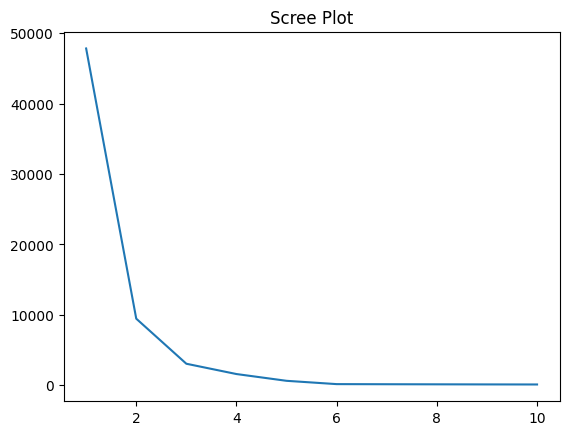

In [14]:
import numpy as np

k_bar = 10

# Create a scree plot:
k_bar = 10 # Consider 10 clusters
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(Z) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

# The 'elbow point' appears to be at k=3, so I will use k=3 below.

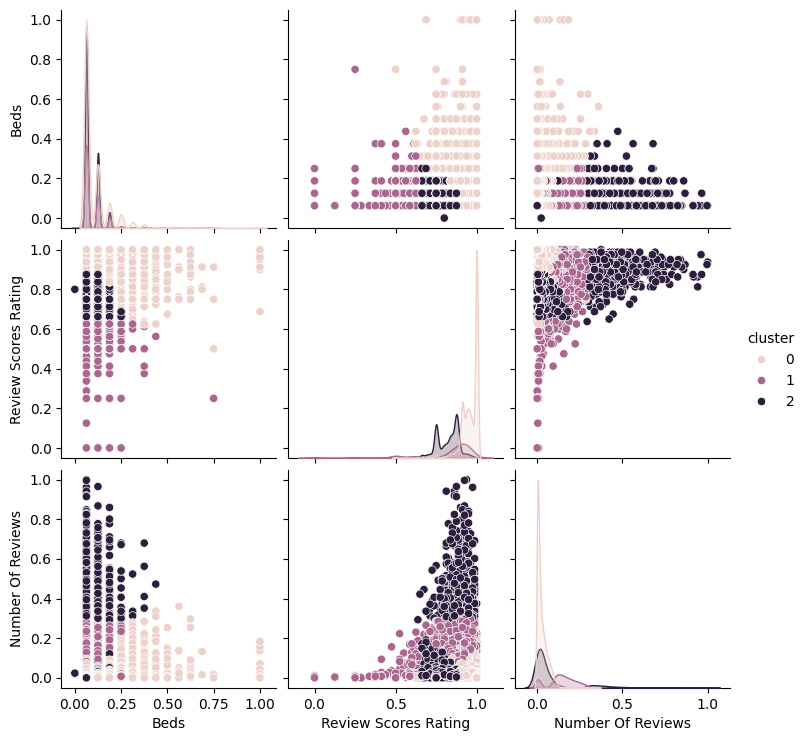

In [19]:
# Fit model and add cluster
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(Z)
Z['cluster'] = model.labels_

# Create pairplot
sns.pairplot(Z, hue='cluster')
X['cluster'] = model.labels_ # Assigns cluster labels to each data point based on the model, so each data point belongs to a cluster


The most well-defined clusters appear between beds and number of reviews, and review scoes rating and beds. The clustering algorithm does not appear to perform well when predicting the clusters of review scores rating and number of reviews.

In [20]:
X['cluster'] = model.labels_ # Assigns cluster labels to each data point based on the model, so each data point belongs to a cluster

# View 'Price' grouped by cluster
X[['Price', 'cluster']].groupby('cluster').describe()

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        12110.0  171.197605  174.317373  10.0  90.0  140.0  200.0  10000.0
1         3661.0  140.249932  117.806958  22.0  80.0  120.0  175.0   5000.0
2         6340.0  131.876341  100.562454  20.0  75.0  110.0  169.0   5000.0

Cluster 0 has the highest average price per night at about 171/night. Clusters 1 and 2 have lower average prices of about 140/night and 132/night. Cluster 0's high price may be skewed by outliers, as the maximum price per night is double that of the maximum prices for Clusters 1 and 2.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```


In [21]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

Text(0.5, 1.0, 'Standard Deviation = 0.125')

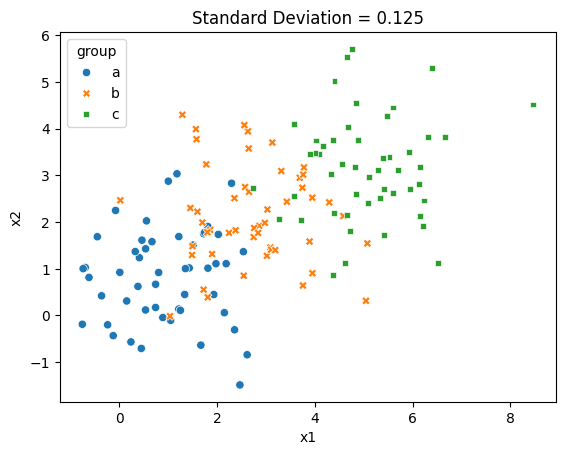

In [46]:
sns.scatterplot(df0_125, x='x1', y='x2', hue='group', style='group')
plt.title("Standard Deviation = 0.125")

Text(0.5, 1.0, 'Standard Deviation = 0.25')

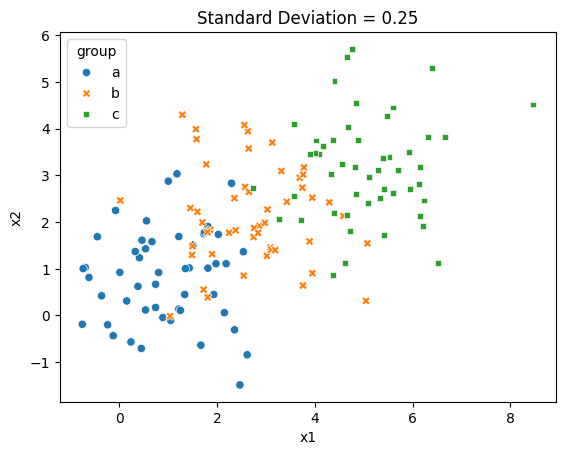

In [47]:
sns.scatterplot(df0_25, x='x1', y='x2', hue='group', style='group')
plt.title("Standard Deviation = 0.25")

Text(0.5, 1.0, 'Standard Deviation = 0.5')

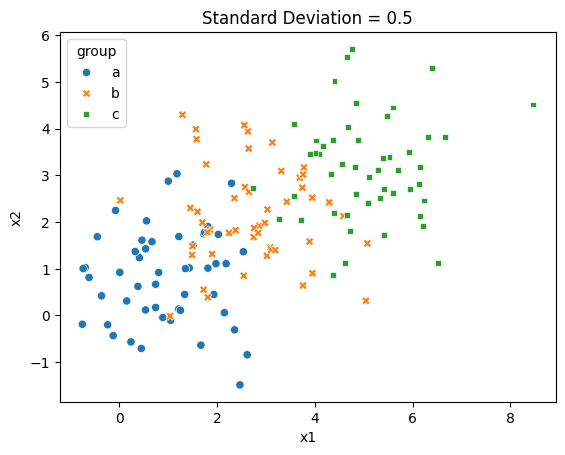

In [43]:
sns.scatterplot(df0_5, x='x1', y='x2', hue='group', style='group')
plt.title("Standard Deviation = 0.5")

Text(0.5, 1.0, 'Standard Deviation = 1.0')

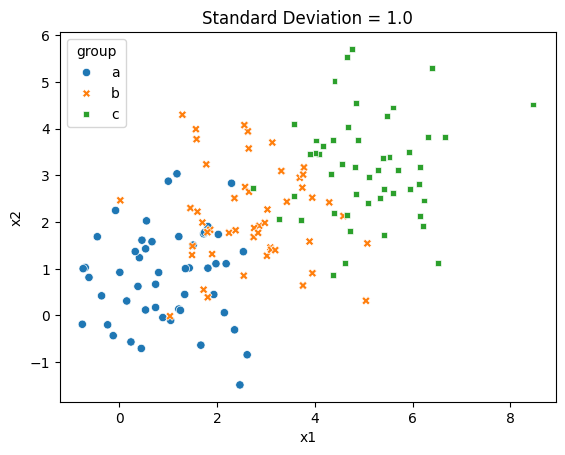

In [44]:
sns.scatterplot(df1_0, x='x1', y='x2', hue='group', style='group')
plt.title("Standard Deviation = 1.0")

Text(0.5, 1.0, 'Standard Deviation = 2.0')

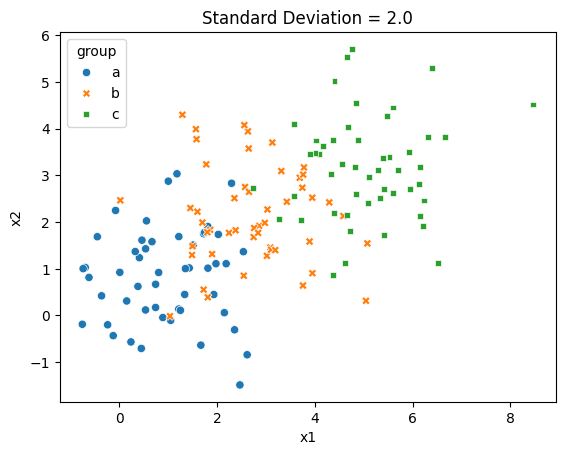

In [45]:
sns.scatterplot(df2_0, x='x1', y='x2', hue='group', style='group')
plt.title("Standard Deviation = 2.0")

As the standard deviation in each of the groups of the dataframes increases, the clusters become more visually distinct.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

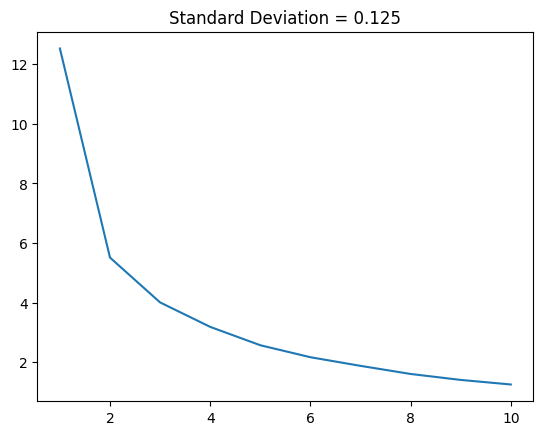

In [33]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Preprocess the data:
X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Standard Deviation = 0.125') # Create scree plot

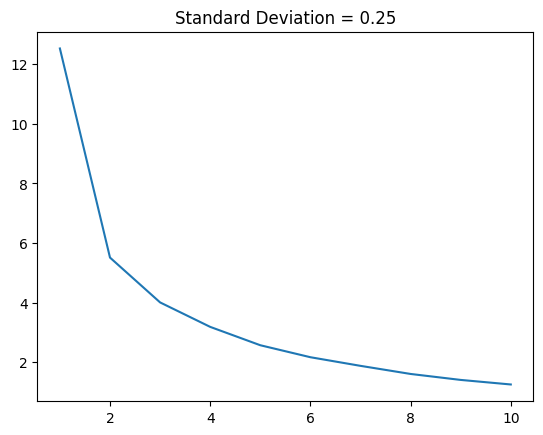

In [34]:
# Preprocess the data:
X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Standard Deviation = 0.25') # Create scree plot

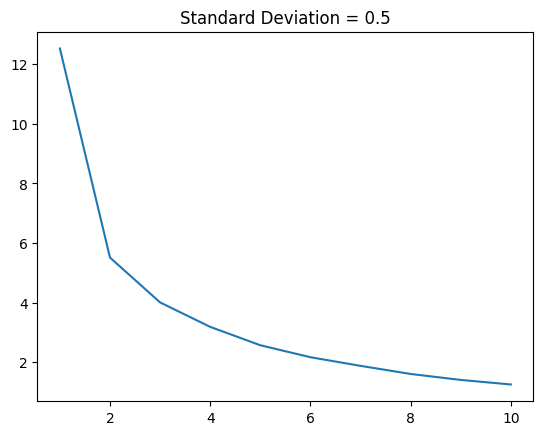

In [35]:
# Preprocess the data:
X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Standard Deviation = 0.5') # Create scree plot

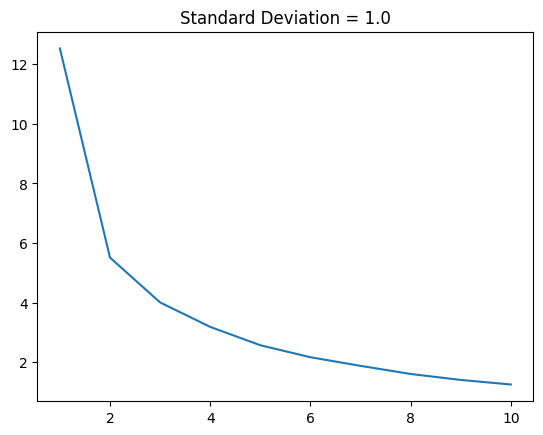

In [36]:
# Preprocess the data:
X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Standard Deviation = 1.0') # Create scree plot


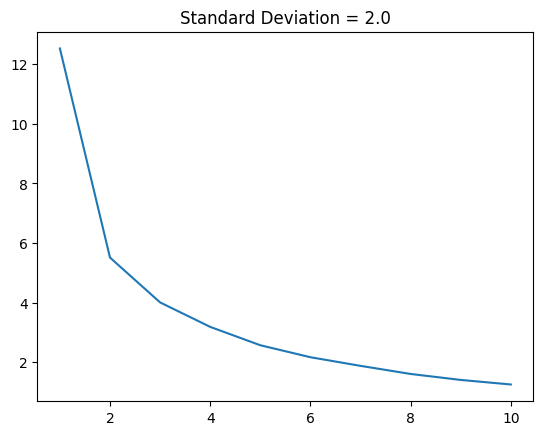

In [37]:
# Preprocess the data:
X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Standard Deviation = 2.0') # Create scree plot

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?